In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import probplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera
#import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
%matplotlib inline 

In [2]:
USA = pd.read_excel('C:/Users/park/Desktop/실증분 8월팀/data/USA.xlsx')
FRA = pd.read_excel('C:/Users/park/Desktop/실증분 8월팀/data/FRA.xlsx')
GBR = pd.read_excel('C:/Users/park/Desktop/실증분 8월팀/data/GBR.xlsx')
DEU = pd.read_excel('C:/Users/park/Desktop/실증분 8월팀/data/DEU.xlsx')
JPN = pd.read_excel('C:/Users/park/Desktop/실증분 8월팀/data/JPN.xlsx')
KOR = pd.read_excel('C:/Users/park/Desktop/실증분 8월팀/data/KOR.xlsx')

In [3]:
def standard_scaling(data):    # 스탠다드 스케일링
    std_scaler = StandardScaler()
    std_scale = std_scaler.fit_transform(data)
    std_scale = pd.DataFrame(std_scale, columns = data.columns, index=list(data.index.values))
    return std_scale

In [4]:
def preprocessing(name):   # 한국 제외한 나라들 전처리
    name['GOVT_RESEARCH'] = name['govt_research']*name['GDP']*0.01
    name = name.iloc[:34]
    name = name.fillna(method='ffill')
    name = name.drop(['TIME', 'real_minimun_wage_ppp', 'r&d_taxrate','LOCATION', 'GDP'], axis = 1)
    name = name.rename(columns={'r&d_investment': 'rnd_investment'})
    #name = standard_scaling(name)
    return standard_scaling(name)

In [5]:
def preprocessing_K(name):   # 한국 전처리
    name['GOVT_RESEARCH'] = name['govt_research']*name['GDP']*0.01
    name = name.iloc[10:34]
    name = name.fillna(method='ffill')
    name = name.drop(['TIME', 'real_minimun_wage_ppp', 'r&d_taxrate','LOCATION', 'GDP'], axis = 1)
    name = name.rename(columns={'r&d_investment': 'rnd_investment'})
    #name = standard_scaling(name)
    return standard_scaling(name)

In [6]:
def preprocessing_U(name):   # 미국 전처리
    #name['GOVT_RESEARCH'] = name['govt_research']*name['GDP']*0.01
    name = name.iloc[10:34]
    name = name.fillna(method='ffill')
    name = name.drop(['TIME', 'real_minimun_wage_ppp', 'r&d_taxrate','LOCATION', 'GDP'], axis = 1)
    name = name.rename(columns={'r&d_investment': 'rnd_investment'})
    #name = standard_scaling(name)
    return standard_scaling(name)

In [7]:
U = preprocessing(USA)
F = preprocessing(FRA)
B = preprocessing(GBR)
D = preprocessing(DEU)
J = preprocessing(JPN)
K = preprocessing_K(KOR)

In [8]:
def OLS_test(df):    # 기본 OLS 검정
    model = sm.OLS.from_formula("triadic_patent_value ~  govt_research + researcher_1000 + rnd_investment + GOVT_RESEARCH", data = df)
    result = model.fit()
    return result.summary()

In [9]:
def OLS_test_U(df):    # 기본 OLS 검정
    model = sm.OLS.from_formula("triadic_patent_value ~ researcher_1000 + rnd_investment", data = df)
    result = model.fit()
    return result.summary()

In [10]:
def VIF_test_U(df):    # VIF >>> 다중공선성 확인
    y, X = dmatrices("triadic_patent_value ~ researcher_1000 + rnd_investment", data = df, return_type = 'dataframe')
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns 
    return vif.round(1)

In [11]:
def qqplot_shapiro_test_U(df):   # 샤피로 테스트 >>> 정규성 검정
    model = smf.ols(formula="triadic_patent_value ~ researcher_1000 + rnd_investment", data = df)
    resid = model.fit().resid
    plt.figure()
    probplot(resid, plot=plt)
    plt.show()
    print(stats.shapiro(resid))

In [12]:
def BP_test_U(df):    # Breusch–Pagan test >>> homoscedasticity, 등분산성 검정
    fit = smf.ols('triadic_patent_value ~ researcher_1000 + rnd_investment', data=df).fit()
    names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    test = sms.het_breuschpagan(fit.resid, fit.model.exog)
    return lzip(names, test)

In [13]:
def VIF_test(df):    # VIF >>> 다중공선성 확인
    y, X = dmatrices("triadic_patent_value ~  govt_research + researcher_1000 + rnd_investment + GOVT_RESEARCH", data = df, return_type = 'dataframe')
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns 
    return vif.round(1)

In [14]:
def qqplot_shapiro_test(df):   # 샤피로 테스트 >>> 정규성 검정
    model = smf.ols(formula="triadic_patent_value ~  govt_research + researcher_1000 + rnd_investment + GOVT_RESEARCH", data = df)
    resid = model.fit().resid
    plt.figure()
    probplot(resid, plot=plt)
    plt.show()
    print(stats.shapiro(resid))

In [15]:
def BP_test(df):    # Breusch–Pagan test >>> homoscedasticity, 등분산성 검정
    fit = smf.ols('triadic_patent_value ~  govt_research + researcher_1000 + rnd_investment + GOVT_RESEARCH', data=df).fit()
    names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
    test = sms.het_breuschpagan(fit.resid, fit.model.exog)
    return lzip(names, test)

In [16]:
def TEST(state):   # 4가지 테스트 한꺼번에
    print(OLS_test(state))
    print('\n')
    print('=========================================================================')
    print(VIF_test(state))
    print('\n')
    print('=========================================================================')
    print(qqplot_shapiro_test(state))
    print('\n')
    print('=========================================================================')
    print(BP_test(state))

In [17]:
def TEST_U(state):   # 4가지 테스트 한꺼번에
    print(OLS_test_U(state))
    print('\n')
    print('=========================================================================')
    print(VIF_test_U(state))
    print('\n')
    print('=========================================================================')
    print(qqplot_shapiro_test_U(state))
    print('\n')
    print('=========================================================================')
    print(BP_test_U(state))

                             OLS Regression Results                             
Dep. Variable:     triadic_patent_value   R-squared:                       0.268
Model:                              OLS   Adj. R-squared:                  0.221
Method:                   Least Squares   F-statistic:                     5.688
Date:                  Wed, 09 Sep 2020   Prob (F-statistic):            0.00787
Time:                          14:56:28   Log-Likelihood:                -42.930
No. Observations:                    34   AIC:                             91.86
Df Residuals:                        31   BIC:                             96.44
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.488

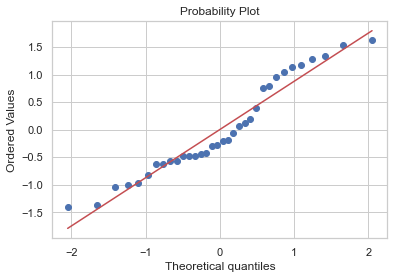

(0.9375954866409302, 0.05230066180229187)
None


[('Lagrange multiplier statistic', 0.27071240668974594), ('p-value', 0.8734047465801387), ('f-value', 0.12440352592929689), ('f p-value', 0.8834620452021692)]


In [18]:
TEST_U(U)

                             OLS Regression Results                             
Dep. Variable:     triadic_patent_value   R-squared:                       0.925
Model:                              OLS   Adj. R-squared:                  0.914
Method:                   Least Squares   F-statistic:                     88.90
Date:                  Wed, 09 Sep 2020   Prob (F-statistic):           7.60e-16
Time:                          14:56:28   Log-Likelihood:                -4.3007
No. Observations:                    34   AIC:                             18.60
Df Residuals:                        29   BIC:                             26.23
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.138

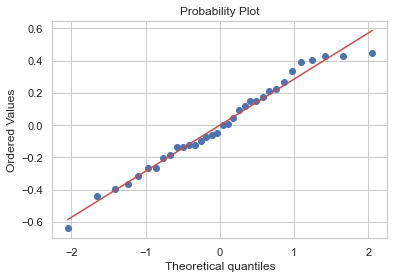

(0.9739944934844971, 0.5796560645103455)
None


[('Lagrange multiplier statistic', 1.290342549317179), ('p-value', 0.8630119184324774), ('f-value', 0.2860006558202048), ('f p-value', 0.8846499806917032)]


In [19]:
TEST(F)

                             OLS Regression Results                             
Dep. Variable:     triadic_patent_value   R-squared:                       0.648
Model:                              OLS   Adj. R-squared:                  0.600
Method:                   Least Squares   F-statistic:                     13.36
Date:                  Wed, 09 Sep 2020   Prob (F-statistic):           2.73e-06
Time:                          14:56:28   Log-Likelihood:                -30.480
No. Observations:                    34   AIC:                             70.96
Df Residuals:                        29   BIC:                             78.59
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.325

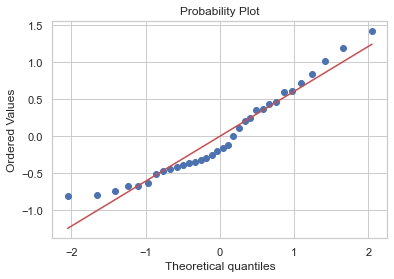

(0.9387542605400085, 0.05660947784781456)
None


[('Lagrange multiplier statistic', 8.844832357021838), ('p-value', 0.06509713935837445), ('f-value', 2.549179377316065), ('f p-value', 0.060444432990756504)]


In [20]:
TEST(B)

                             OLS Regression Results                             
Dep. Variable:     triadic_patent_value   R-squared:                       0.716
Model:                              OLS   Adj. R-squared:                  0.677
Method:                   Least Squares   F-statistic:                     18.26
Date:                  Wed, 09 Sep 2020   Prob (F-statistic):           1.36e-07
Time:                          14:56:28   Log-Likelihood:                -26.858
No. Observations:                    34   AIC:                             63.72
Df Residuals:                        29   BIC:                             71.35
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -5.1

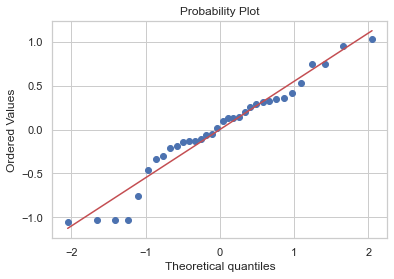

(0.9516143798828125, 0.13724777102470398)
None


[('Lagrange multiplier statistic', 5.994381530162328), ('p-value', 0.19956825727794214), ('f-value', 1.5518052615221813), ('f p-value', 0.21361147957303356)]


In [21]:
TEST(D)

                             OLS Regression Results                             
Dep. Variable:     triadic_patent_value   R-squared:                       0.960
Model:                              OLS   Adj. R-squared:                  0.955
Method:                   Least Squares   F-statistic:                     174.3
Date:                  Wed, 09 Sep 2020   Prob (F-statistic):           7.80e-20
Time:                          14:56:28   Log-Likelihood:                 6.5081
No. Observations:                    34   AIC:                            -3.016
Df Residuals:                        29   BIC:                             4.616
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -9.021

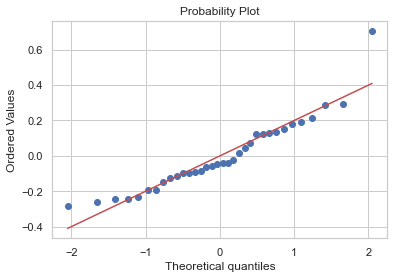

(0.9102469682693481, 0.008651024661958218)
None


[('Lagrange multiplier statistic', 1.9821298403635959), ('p-value', 0.7390458705802461), ('f-value', 0.44882564864518343), ('f p-value', 0.7723564494789495)]


In [22]:
TEST(J)

                             OLS Regression Results                             
Dep. Variable:     triadic_patent_value   R-squared:                       0.882
Model:                              OLS   Adj. R-squared:                  0.857
Method:                   Least Squares   F-statistic:                     35.53
Date:                  Wed, 09 Sep 2020   Prob (F-statistic):           1.42e-08
Time:                          14:56:29   Log-Likelihood:                -8.4007
No. Observations:                    24   AIC:                             26.80
Df Residuals:                        19   BIC:                             32.69
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.388

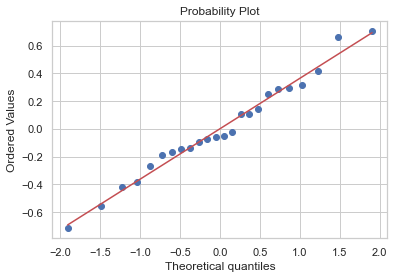

(0.9817910194396973, 0.9264191389083862)
None


[('Lagrange multiplier statistic', 11.086639873649691), ('p-value', 0.025607365230504928), ('f-value', 4.0780663502427785), ('f p-value', 0.014939325625928614)]


In [23]:
TEST(K)

In [24]:
K.head()

,triadic_patent_value,govt_research,researcher_1000,rnd_investment,GOVT_RESEARCH
10,-1.788222,2.130237,-1.207157,-1.181264,-0.772263
11,-1.798004,1.997399,-1.250016,-1.107220,-0.458488
12,-1.714880,1.799664,-1.230246,-1.047750,-0.298486
13,-1.607569,1.244072,-1.285303,-1.140459,-1.186467
14,-1.454616,1.655490,-1.202182,-1.092651,-0.125845


In [25]:
endog = J['triadic_patent_value']

In [26]:
exog = J.drop(['triadic_patent_value'], axis = 1)
exog['constant'] = 1

In [27]:
exog

,govt_research,researcher_1000,rnd_investment,GOVT_RESEARCH,constant
0,2.716954,-2.178250,-1.961895,0.346727,1
1,2.438259,-2.052371,-1.911278,0.388836,1
2,1.956386,-1.795807,-1.710342,0.163496,1
3,1.693068,-1.623691,-1.478199,0.963278,1
4,1.295680,-1.427810,-1.180127,0.898277,1
5,1.015597,-1.279121,-0.896012,1.160552,1
6,0.836207,-1.238818,-0.809329,1.385694,1
7,0.616206,-1.071396,-0.850394,0.845342,1
8,0.417092,-0.922859,-0.950330,0.047440,1
9,0.312674,-0.765791,-0.992700,-0.079203,1


In [28]:
model = sm.RLM(endog, exog).fit()   ### 일본 로버스트 선형 회귀분석
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Robust linear Model Regression Results                     
================================================================================
Dep. Variable:     triadic_patent_value   No. Observations:                   34
Model:                              RLM   Df Residuals:                       29
Method:                            IRLS   Df Model:                            4
Norm:                            HuberT                                         
Scale Est.:                         mad                                         
Cov Type:                            H1                                         
Date:                  Wed, 09 Sep 2020                                         
Time:                          14:56:29                                         
No. Iterations:                      17                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
govt_research       0.4619      0.121      3.831      0.000       0.226       0.698
researcher_1000     1.1147      0.116      9.630      0.000       0.888       1.342
rnd_investment      0.3212      0.115      2.800      0.005       0.096       0.546
GOVT_RESEARCH       0.1746      0.051      3.394      0.001       0.074       0.275
constant           -0.0147      0.034     -0.435      0.663      -0.081       0.051
===================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""